In [2]:
!pip install scikit-learn numpy pandas matplotlib seaborn tensorflow keras mlxtend

  Using cached numpy-2.2.5-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mordred 1.2.0 requires numpy==1.*, but you have numpy 2.1.3 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


# Práctica de machine learning
En esta práctica realizaréis el entrenamiento de 3 tipos de arquitecturas: 
- SVM
- Ensemble
- Redes neuronales Secuenciales

## Parte I: Entrenar un SVM basado en el dataset iris

In [6]:
# Librerías importadas
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions


In [8]:
# Carga del dataset de Iris
iris = datasets.load_iris()
x = iris.data
y = iris.target
column_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Crear el DataFrame con los datos
df = pd.DataFrame(x, columns=column_names)
# TODO figure out what the target is
# Agregar la columna de etiquetas
df['target'] = y

# Visualizar las primeras filas del DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**1) Separar el dataset en train y test** 


In [ ]:
# Split the dataset into train and test sets
# I probably should split into train, validation and test sets but for now I will just split into train and test as the exercise asks
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


**2) LLamar a la arquitectura de Support Vector Machines** dejando los hiperparámetros por defecto

In [10]:
# Create an SVM model with default parameters
svm_model = SVC()

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Display the model
print(svm_model)

SVC()


**3) Usar el test set para evaluar la capacidad de inferir del modelo datos nunca vistos**

In [11]:
# Evaluate the model on the test set
accuracy = svm_model.score(X_test, y_test)

# Display the accuracy
print(f"Accuracy on test set: {accuracy:.2f}")

Accuracy on test set: 1.00


**4) Crear una matriz de confusión con las predicciones del modelo sobre el test set**


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


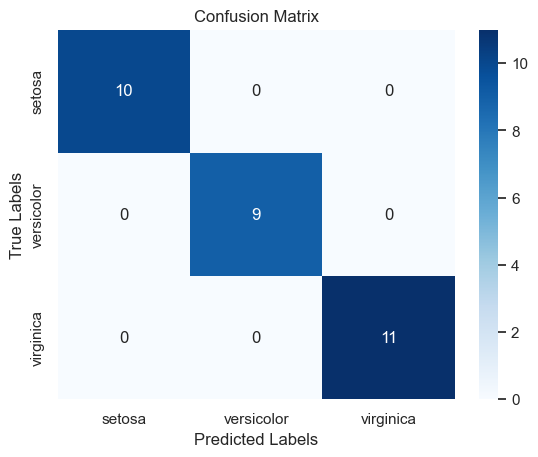

In [ ]:
# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Parte II: Reglas explícitas versus Aprendizaje automático

En las celdas subsiguientes os voy a presentar como se haría los cortes de hiperplanos manualmente. Vosotros después tenéis que entrenar un modelo de aprendizaje automático SVM para llegar a mejores resultados sin tener que haber definido reglas explícitas para la clasificación, más allá de la propia configuración de la arquitectura

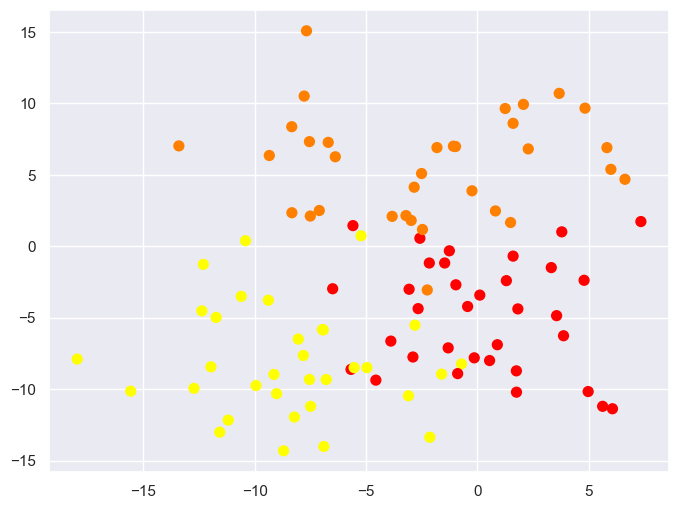

In [16]:
# Creamos un dataset aleatorio
X, y = make_blobs(n_samples=100, centers=3,
                  random_state=100, cluster_std=4)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
xfit = np.linspace(-1, 3.5, 100)



### Reglas explícitas

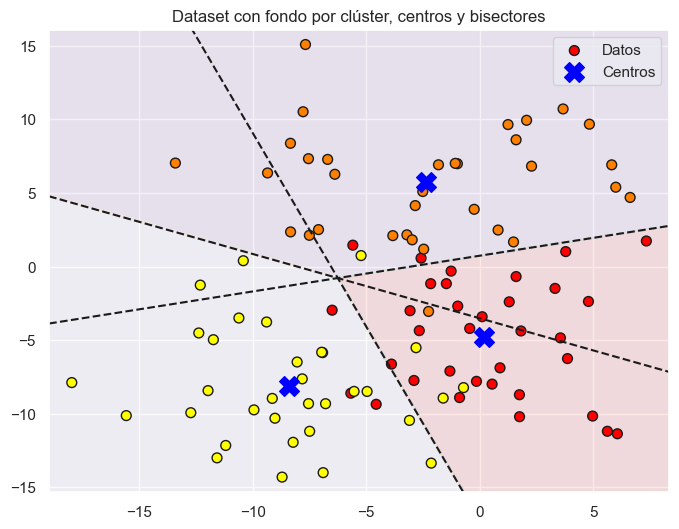

In [14]:

# Centros de cada clúster
unique_labels = np.unique(y)
centers = np.array([X[y == label].mean(axis=0) for label in unique_labels])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Asignamos a cada punto de la malla el clúster cuya distancia al centro es mínima (diagrama de Voronoi)
distances = np.array([np.linalg.norm(grid_points - center, axis=1)
                      for center in centers])
cluster_pred = np.argmin(distances, axis=0).reshape(xx.shape)

# Graficar el bisector entre dos centros
def plot_bisector(A, B):
    # Punto medio entre A y B
    M = (A + B) / 2
    # Evitamos división por cero si los puntos tienen la misma x
    if B[0] - A[0] != 0:
        slope = (B[1] - A[1]) / (B[0] - A[0])
        if slope != 0:
            bisector_slope = -1 / slope
            x_vals = np.linspace(x_min, x_max, 200)
            y_vals = bisector_slope * (x_vals - M[0]) + M[1]
            plt.plot(x_vals, y_vals, '--k', lw=1.5)
        else:
            # Si la línea que une A y B es horizontal, la perpendicular es vertical
            plt.axvline(M[0], linestyle='--', color='k', lw=1.5)
    else:
        # Si están alineados verticalmente, la perpendicular es horizontal
        plt.axhline(M[1], linestyle='--', color='k', lw=1.5)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, cluster_pred, alpha=0.3, cmap='Pastel1')

# Poner la leyenda
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k', label='Datos')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, marker='X', label='Centros')

# Líneas bisectrices entre cada par de centros
for (i, j) in combinations(range(len(centers)), 2):
    plot_bisector(centers[i], centers[j])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Dataset con fondo por clúster, centros y bisectores")
plt.legend()
plt.show()

### Entrenamiento del SVM de aprendizaje automático con kernel lineal y una función de decisión One versus Rest

In [19]:
# Split the dataset into train and test sets
# I probably should split into train, validation and test sets but for now I will just split into train and test as the exercise asks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


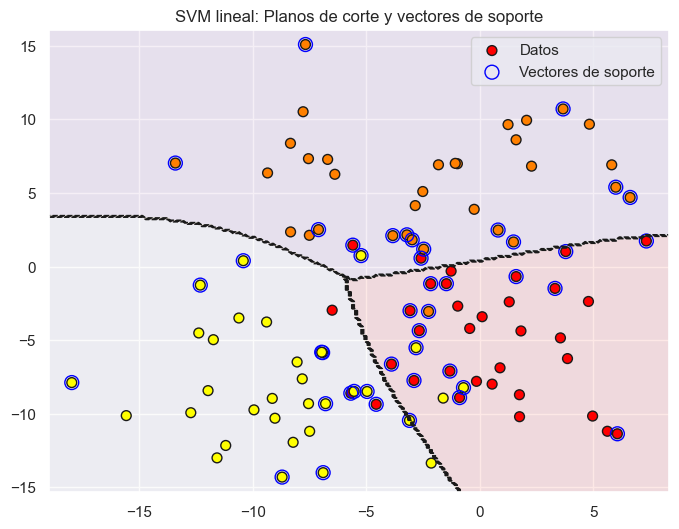

In [20]:
# Create an SVM model with default parameters
svm_model = SVC()

# Train the model using the training data
svm_model.fit(X_train, y_train)



# Graficar el resultado y entender las fronteras de corte del hiperplano
# Malla de visualización
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predicción de cada clase
Z = svm_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Graficar regiones de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')  # Fondo coloreado según la predicción
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k', label='Datos')

# Vectores de soporte
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='blue', label='Vectores de soporte')

# 6. Fronteras de decisión usando un contorno basado en la predicción de clases.
plt.contour(xx, yy, Z, colors='k', linewidths=1, linestyles='--')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("SVM lineal: Planos de corte y vectores de soporte")
plt.legend()
plt.show()

## Parte III: Ensembling 

In [21]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

**1) Separar train de test para random state 42 y un porcentaje de test del 20% y luego mostrar la forma de cada dataset**

In [22]:
# Split the dataset into train and test sets
# I probably should split into train, validation and test sets but for now I will just split into train and test as the exercise asks
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


**2) Definir 3 algortimos:** 
- Una regresión logística con 100 iteraciones
- Un árbol de decisión con todos los hiperparámetros por defecto
- Una arquitectura de Naive Bayes gaussiana

In [23]:
# Definir los tres algoritmos
logistic_regression = LogisticRegression(max_iter=100)
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Mostrar los modelos definidos
print("Logistic Regression:", logistic_regression)
print("Decision Tree Classifier:", decision_tree)
print("Gaussian Naive Bayes:", naive_bayes)

Logistic Regression: LogisticRegression()
Decision Tree Classifier: DecisionTreeClassifier()
Gaussian Naive Bayes: GaussianNB()


**3) Entrenar cada modelo con una validación cruzada de 5 folds**

In [24]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for each model
logistic_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
naive_bayes_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)

# Display the mean accuracy for each model
print("Logistic Regression 5-fold CV mean accuracy:", logistic_scores.mean())
print("Decision Tree 5-fold CV mean accuracy:", decision_tree_scores.mean())
print("Gaussian Naive Bayes 5-fold CV mean accuracy:", naive_bayes_scores.mean())

Logistic Regression 5-fold CV mean accuracy: 0.9666666666666666
Decision Tree 5-fold CV mean accuracy: 0.95
Gaussian Naive Bayes 5-fold CV mean accuracy: 0.9416666666666668


**4) Crear un modelo de ensemble con la clase VotingClassifier de scikit-learng con opción de voto "hard"**

In [25]:
# Create a VotingClassifier with "hard" voting
voting_clf = VotingClassifier(estimators=[
    ('logistic', logistic_regression),
    ('decision_tree', decision_tree),
    ('naive_bayes', naive_bayes)
], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Display the ensemble model
print(voting_clf)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision_tree', DecisionTreeClassifier()),
                             ('naive_bayes', GaussianNB())])


**5) Ahora definir otros 3 algoritmos:**
- Un árbol de decisión regularizado a un nivel de profundidad, con un random state 0 y con la función de pérdida como entropía
- Un multilayer perceptron con 3 hidden layers, un random state de 10, un learning rate de 0.1, un batch size de 10 y un máximo de iteraciones de 100
- Un random forest con dos árboles de decisión y un random state de 10

In [26]:
# Definir los tres algoritmos
decision_tree_reg = DecisionTreeClassifier(max_depth=1, random_state=0, criterion='entropy')
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=10, learning_rate_init=0.1, batch_size=10, max_iter=100)
random_forest = RandomForestClassifier(n_estimators=2, random_state=10)

# Mostrar los modelos definidos
print("Regularized Decision Tree:", decision_tree_reg)
print("Multilayer Perceptron:", mlp_classifier)
print("Random Forest:", random_forest)

Regularized Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
Multilayer Perceptron: MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.1, max_iter=100, random_state=10)
Random Forest: RandomForestClassifier(n_estimators=2, random_state=10)


**6) Generar un ensemble de los 3 con soft voting**

In [27]:
# Create a VotingClassifier with "soft" voting
soft_voting_clf = VotingClassifier(estimators=[
    ('decision_tree_reg', decision_tree_reg),
    ('mlp_classifier', mlp_classifier),
    ('random_forest', random_forest)
], voting='soft')

# Train the ensemble model
soft_voting_clf.fit(X_train, y_train)

# Display the ensemble model
print(soft_voting_clf)

VotingClassifier(estimators=[('decision_tree_reg',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=1,
                                                     random_state=0)),
                             ('mlp_classifier',
                              MLPClassifier(batch_size=10,
                                            hidden_layer_sizes=(100, 100, 100),
                                            learning_rate_init=0.1,
                                            max_iter=100, random_state=10)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=2,
                                                     random_state=10))],
                 voting='soft')


/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


**7) Predecir los resultados del ensemble**

In [28]:
# Predict the labels for the test set using the ensemble model
ensemble_predictions = soft_voting_clf.predict(X_test)

# Display the predictions
print("Ensemble Predictions:", ensemble_predictions)

Ensemble Predictions: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


**8) Plottear la Confusion Matrix**

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


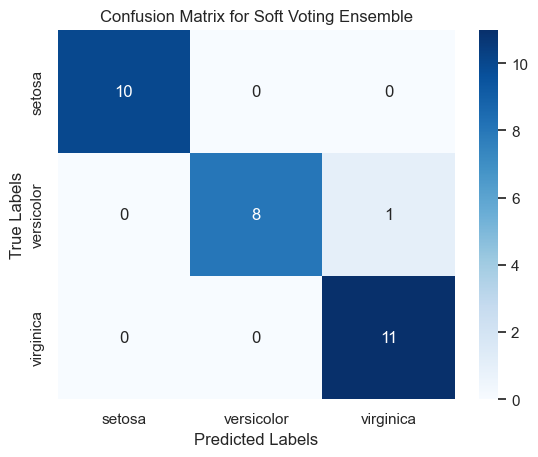

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Soft Voting Ensemble')
plt.show()

## Parte IV: Redes neuronales secuenciales (DNNs)
El objetivo es que entrenéis diferentes tipos de redes neuronales basándose en su complejidad en términos de neuronas, capas de profunidad y regularización

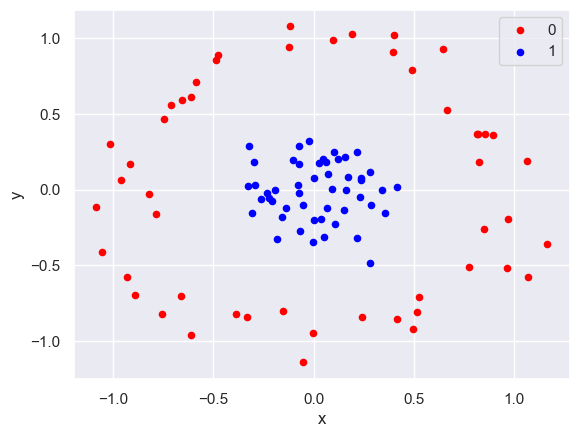

In [30]:
# Generar datos concéntricos
X, y = make_circles(n_samples=100, noise=0.1, factor=0.25, random_state=101)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**1) Entrenar una red secuencial densa de una sola hidden layer**
- *Pista: la input layer tiene una shape de (2,) y la output layer tiene una activación "sigmoide"*
- *Instrucción adicional --> Compilad el modelo con el optimizador Adam, la función de pérdida de MSE y con la métrica accuracy*

In [33]:
# Crear la arquitectura
model = Sequential([
    Dense(4, input_shape=(2,), activation='relu'),  # Hidden layer with 4 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])


/Users/mauriciodeoliveirareis/.pyenv/versions/tensorflow_bioinformatics/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**2) Mostrar el resumen del número de parámetros entrenables**

In [34]:
# Display the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

**3) Entrenar el modelo con un 20% del test y un número de épocas de 300**

In [35]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=1)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3493 - loss: 0.2640 - val_accuracy: 0.4667 - val_loss: 0.2432
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3688 - loss: 0.2568 - val_accuracy: 0.4667 - val_loss: 0.2427
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3806 - loss: 0.2562 - val_accuracy: 0.5333 - val_loss: 0.2418
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3701 - loss: 0.2522 - val_accuracy: 0.6000 - val_loss: 0.2412
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4556 - loss: 0.2473 - val_accuracy: 0.6000 - val_loss: 0.2404
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4667 - loss: 0.2447 - val_accuracy: 0.7333 - val_loss: 0.2393
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5229 - loss: 0.2434 - val_accuracy: 0.7333 - val_loss: 0.2383
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6299 - loss: 0.2393 - val_accuracy: 0.7333 - val_loss:

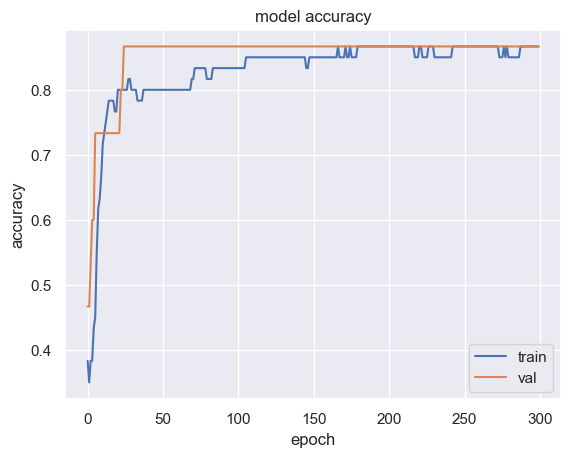

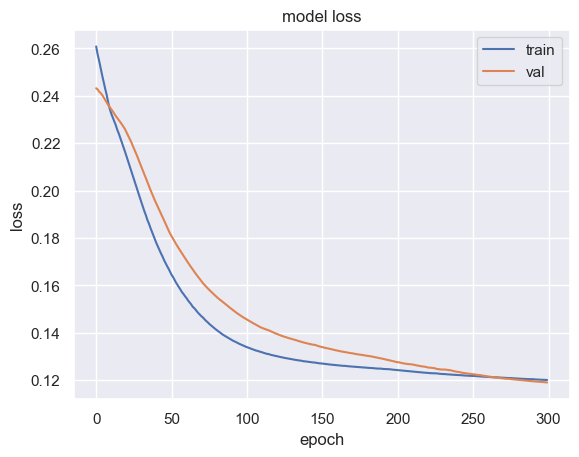

In [36]:
# Este es el plot de los resultados
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


**4) Evaluar el rendimiento del modelo**


In [37]:
# Evaluate the model on the test set
test_results = model.evaluate(X_test, y_test, verbose=1)

# Display the test results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8800 - loss: 0.1044
Test Loss: 0.10439617186784744
Test Accuracy: 0.8799999952316284


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 156us/step


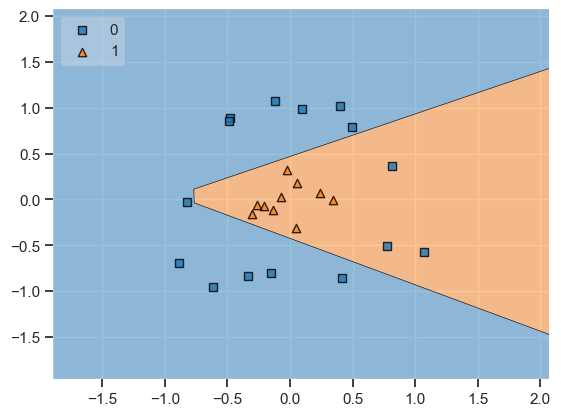

In [38]:
# Visualizar el umbral de decisión del modelo
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

**5) Realizar el mismo procedimiento para:**

- 2 neuronas con una sola capa densa
- 10 neuronas con una sola capa densa
- 5 Neuronas con en dos capas densas distribuidas en 3 y 2 neuronas por cada capa densa
- Analizar los resultados y la comparativa con respecto a la relación nº de parámetros/rendimiento/profundad de la red

Architecture: 2 neurons, 1 dense layer


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

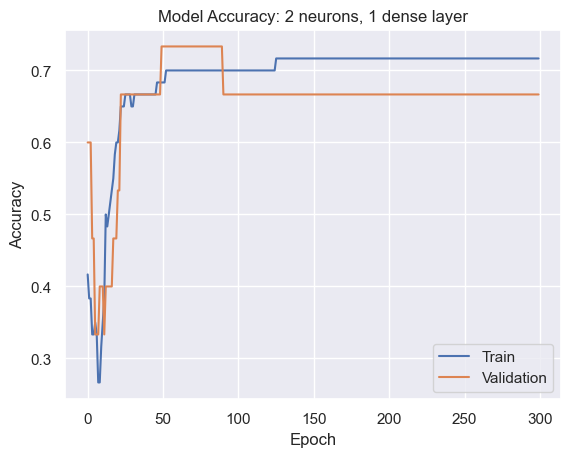

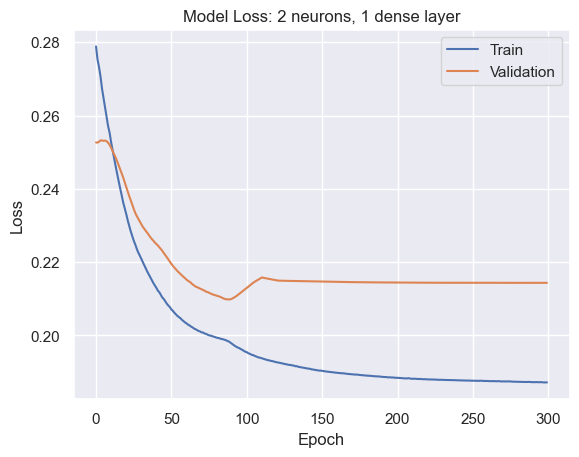

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 156us/step


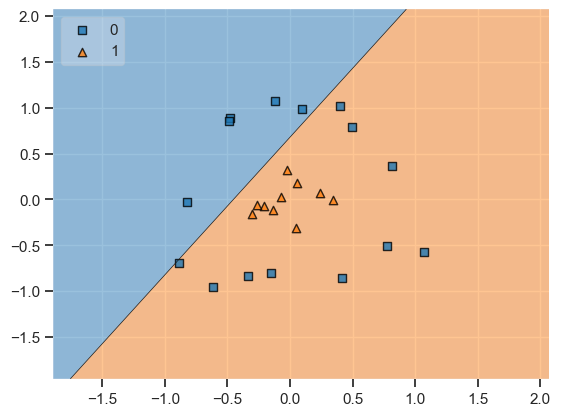

Architecture: 10 neurons, 1 dense layer


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

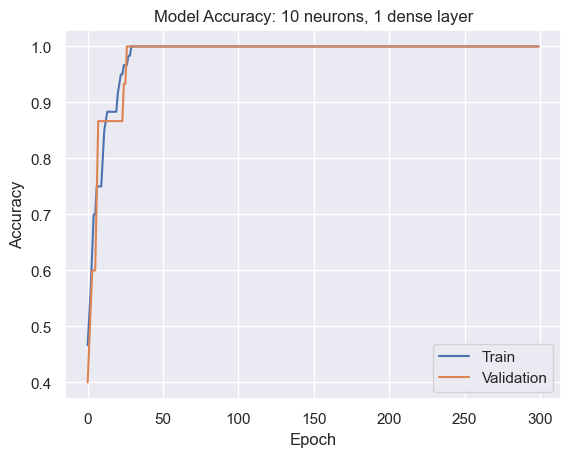

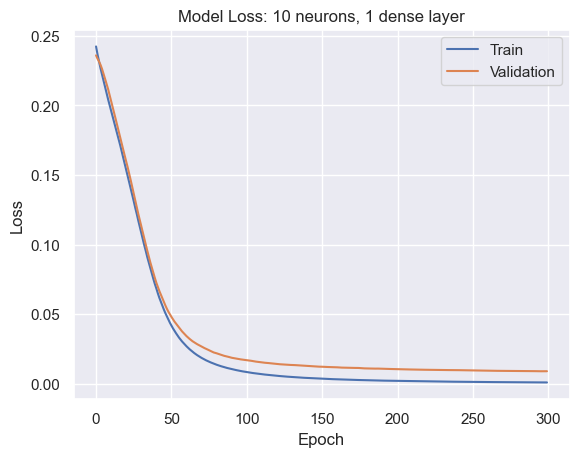

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 156us/step


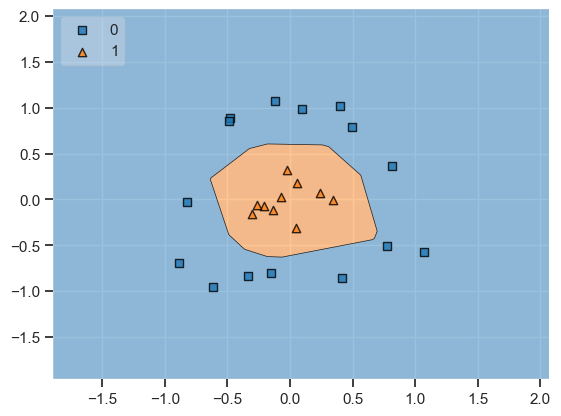

Architecture: 5 neurons, 2 dense layers (3+2)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

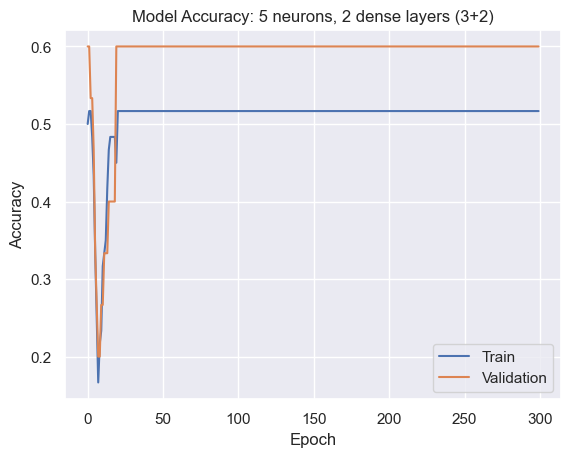

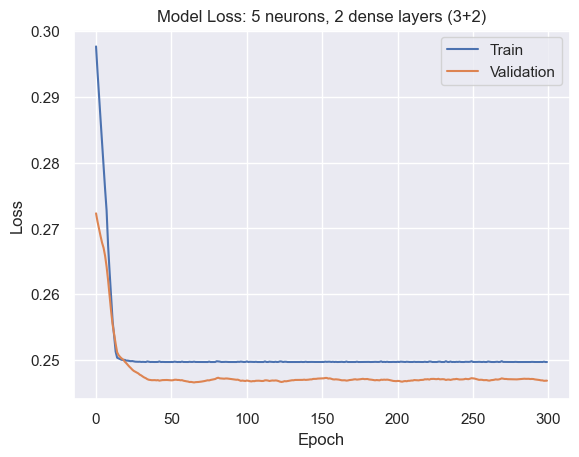

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 157us/step


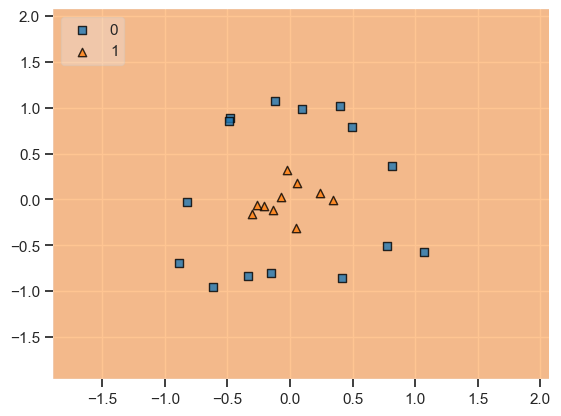

Architecture: 2 neurons, 1 dense layer, Test Loss: 0.2174, Test Accuracy: 0.6000
Architecture: 10 neurons, 1 dense layer, Test Loss: 0.0025, Test Accuracy: 1.0000
Architecture: 5 neurons, 2 dense layers (3+2), Test Loss: 0.2537, Test Accuracy: 0.4000


In [40]:
# Definir arquitecturas de redes neuronales
architectures = [
    {"layers": [Dense(2, input_shape=(2,), activation='relu'), Dense(1, activation='sigmoid')], "description": "2 neurons, 1 dense layer"},
    {"layers": [Dense(10, input_shape=(2,), activation='relu'), Dense(1, activation='sigmoid')], "description": "10 neurons, 1 dense layer"},
    {"layers": [Dense(3, input_shape=(2,), activation='relu'), Dense(2, activation='relu'), Dense(1, activation='sigmoid')], "description": "5 neurons, 2 dense layers (3+2)"}
]

results = []

for arch in architectures:
    # Crear el modelo
    model = Sequential(arch["layers"])
    
    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])
    
    # Mostrar el resumen del modelo
    print(f"Architecture: {arch['description']}")
    model.summary()
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=0)
    
    # Evaluar el modelo
    test_results = model.evaluate(X_test, y_test, verbose=0)
    results.append({
        "description": arch["description"],
        "test_loss": test_results[0],
        "test_accuracy": test_results[1]
    })
    
    # Graficar resultados
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f"Model Accuracy: {arch['description']}")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f"Model Loss: {arch['description']}")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    # Visualizar el umbral de decisión del modelo
    plot_decision_regions(X_test, y_test, clf=model, legend=2)
    plt.show()

# Mostrar resultados comparativos
for result in results:
    print(f"Architecture: {result['description']}, Test Loss: {result['test_loss']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")